# Regression Analysis in Data Science 

## LEC NO. 42) Multiple Linear Regression OR Multiple Regression:

###### In Linear Regression We can predict the CO2 emission of a car based on the size of the engine (volume), but with multiple regression we can throw in more variables, like the weight of the car, to make the prediction more accurate. So, Here we will predict the CO2 emission of the car based on its Volume and weight.

### STEP-1) Import Packages and Classes
The first step is to import the packages

1) The Pandas module allows us to read csv files and return a DataFrame object.

2) The class LinearRegression from sklearn.linear_model, it  will be used to perform linear and polynomial regression and make predictions accordingly.

3) Matplotlib.pyplot for visualization of data

4) Numpy for numeric calculations and array handling

5) Sklearn.metrics for error checking

In [100]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

### STEP-2) Providing Data
The second step is defining data to work with.

In [101]:
df = pd.read_csv(r"F:\DataScience\cars.csv")
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubish,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


Now make a list of the independent values and call
this variable x.
Put the dependent values in a variable called y.


In [102]:
X = df[['Weight', 'Volume']]
y = df['CO2']
print(x)
y

    Weight  Volume
0      790    1000
1     1160    1200
2      929    1000
3      865     900
4     1140    1500
5      929    1000
6     1109    1400
7     1365    1500
8     1110    1500
9     1150    1600
10     980    1100
11     990    1300
12    1112    1000
13    1252    1600
14    1326    1600


0      99
1      95
2      95
3      90
4     105
5     105
6      90
7      92
8      98
9      99
10     99
11    101
12     99
13     94
14     97
Name: CO2, dtype: int64

## STEP-3)  Create a Model and Fit it
The next step is to create a linear regression model
and fit it using the existing data.

In [103]:
# Let’s create an instance of the class LinearRegression, which will
# represent the regression model:
MLR_model = LinearRegression()

In [104]:
# This object has a method called fit() that takes the independent and
# dependent values as parameters and fills the regression object with data 
# that describes the relationship.
MLR_model.fit(X,y)

LinearRegression()

OR we can also use:

MLR_model = LinearRegression().fit(X, y)

### STEP-4) Get Results as Coefficient
Once you have your model fitted, you can get the
results to check whether the model works
satisfactorily and interpret it.

###### Coefficient:
The coefficient is a factor that describes the
relationship with an unknown variable.
In this case, we can ask for the coefficient value of
weight against CO2, and for volume against CO2.
The answer(s) we get tells us what would happen if
we increase, or decrease, one of the independent
values.

In [105]:
# Print the coefficient values of the regression object:
print(MLR_model.coef_)
print("The result array is represents the coefficient values corresponding to weight and volume.")

[-0.01391516  0.00651925]
The result array is represents the coefficient values corresponding to weight and volume.


### STEP-5) Predict Response
Once there is a satisfactory model, you can use it
for predictions with either existing or new data.
To obtain the predicted response, use .predict() .

Now we have a regression object that are ready to
predict CO2 values based on a car's weight and
volume.

In [106]:
y_pred = MLR_model.predict(X)
print('predicted response:', y_pred)

predicted response: [99.4165025  95.57174092 97.48229466 97.72094057 97.80581801 97.48229466
 97.5852635  94.67490605 98.22327294 98.31859097 97.42454589 98.58924345
 94.9358196  96.89924422 95.86952206]


In [107]:
#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3 :
predictedCO2 = MLR_model.predict([[2300, 1300]])
print(predictedCO2)

[80.36037824]


In above example, We have predicted that a car with 1.3 litre
engine, and a weight of 2300 kg, will release
approximately 80 grams of CO2 for every
kilometre it drives.

(It is different from ppt becuse we use differen csv file which have only 15 rows data)

### STEP-6) Model Evaluation

It’s important that our models have high, out-of-sample
accuracy, because the purpose of our model is, of course, to
make correct predictions on unknown data.
So, how can we improve out-of-sample accuracy?
One way is to use another evaluation approach called
"Train/Test Split."

Train/Test Split involves splitting the dataset into training
and testing sets, respectively, which are mutually exclusive,
after which, you train with the training set and test with
the testing set. This will provide a more accurate evaluation
on out-of-sample accuracy because the testing
dataset is NOT part of the dataset that has been used to
train the data. It is more realistic for real world problems.

For evaluate the model first of all let's split the the dataset by using function "train_test_split()". You need to pass 3 parameters.
>Features(independent variables), target(dependent variable) and test_set size
>You can also use random_state to select records and randomly

Here "test_size" decides the size of the data that has to be split as the test dataset. And "random_state" is basically used for reproducing your problem the same every time it is run.

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In above script, the dataswt is broken into two parts in a ratio of 80:20 . It means that 80% data will be used for model training and 20% for model testing.

In [122]:
X_train

,Weight,Volume
9,1150,1600
14,1326,1600
4,1140,1500
2,929,1000
13,1252,1600
10,980,1100
7,1365,1500
11,990,1300
3,865,900
0,790,1000


In [123]:
y_train

9      99
14     97
4     105
2      95
13     94
10     99
7      92
11    101
3      90
0      99
5     105
12     99
Name: CO2, dtype: int64

##### Now we will Train the model

In [124]:
MLR_model.fit(X_train,y_train)

LinearRegression()

##### Now predict the values

In [125]:
X_test

,Weight,Volume
1,1160,1200
6,1109,1400
8,1110,1500


In [126]:
pred_y=MLR_model.predict(X_test)
print(pred_y)

[95.94018776 98.53610405 99.40959689]


In [127]:
y_test

1    95
6    90
8    98
Name: CO2, dtype: int64

##### Now we will check the error's Quantity

There are metrics used to evaluate linear models.
These are (1)Mean absolute error[MAE], (2)Mean squared error[MSE], (3)Root mean squared error[RMSE]

>1) MAE: The easiest to understand. Represents average error.

>2) MSE: Similar to MAE but noise isexaggerated and larger errors are "punished". It is harder to interpret than MAE as it's not in base units, however, it is generally more popular.

>3) RMSE: Most popular metric, similar to MSE, however the result is square rooted to make it more interpretableas it's in base units. 

It is recommended that RMSE be used as the primary matric to interpret your model. Lower values of RMSE indiate better fit.

In [128]:
# Now we will check the predictions against the actual values by using the RMSE
import numpy as np
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,pred_y)))  
# Square root of(MSE)

5.0244730676231635


#### Comparison between Predicted and Actual values of CO2 Emmission

In [129]:
predictedCO2=MLR_model.predict(X)
print(predictedCO2)

[100.08766367  95.94018776  97.86122301  97.99683637  98.92907013
  97.86122301  98.53610405  95.32511944  99.40959689  99.65840495
  97.93383792  99.55268313  94.93000978  98.02461396  96.83931462]


In [130]:
print("Actual values of CO2 :")
y

Actual values of CO2 :


0      99
1      95
2      95
3      90
4     105
5     105
6      90
7      92
8      98
9      99
10     99
11    101
12     99
13     94
14     97
Name: CO2, dtype: int64

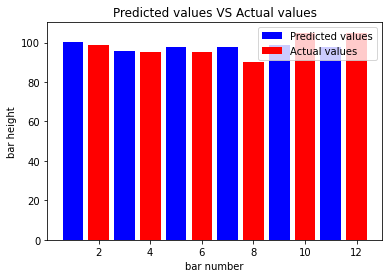

In [139]:
import matplotlib.pyplot as plt

plt.bar([1,3,5,7,9,11],predictedCO2[0:6], label='Predicted values',color='b')
plt.bar([2,4,6,8,10,12],y[0:6], label='Actual values', color='r')
plt.legend()

plt.xlabel('bar number')
plt.ylabel('bar height')
plt.title('Predicted values VS Actual values')
plt.show()